In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_excel("data/AGV_2.1.xlsx").fillna(-1)
df.columns = [i for i in range(41)]
df.index = [i for i in range(1, 41)]
G = nx.Graph()

# 获取有效数据
for i, row in df.iterrows():
    l_tmp = []
    for idx, val in row.items():
        if val != float(-1) and type(val) != type('站点1'):
            if G.get_edge_data(i, idx):  # 去重
                continue
            l_tmp.append((i, idx, val))
            G.add_edge(i, idx, weight=val)
    print(l_tmp)

[(1, 2, 2.4)]
[(2, 3, 7.2)]
[(3, 4, 4.7)]
[(4, 5, 4.1)]
[(5, 6, 8.4)]
[(6, 7, 3.1)]
[(7, 8, 6.8)]
[(8, 9, 6.0)]
[(9, 10, 3.9)]
[(10, 11, 4.2)]
[(11, 12, 4.2)]
[(12, 13, 8.2)]
[(13, 14, 8.6)]
[(14, 15, 7.4)]
[(15, 16, 1.6)]
[(16, 17, 9.2)]
[(17, 18, 5.8)]
[(18, 19, 4.1)]
[(19, 20, 4.8)]
[(20, 21, 7.0)]
[(21, 22, 8.2)]
[(22, 23, 1.5)]
[(23, 24, 5.5)]
[(24, 25, 1.0)]
[(25, 26, 2.3)]
[(26, 27, 1.8)]
[(27, 28, 1.0)]
[(28, 29, 6.5)]
[(29, 30, 9.2)]
[(30, 31, 9.4)]
[(31, 32, 7.5)]
[(32, 33, 5.8)]
[(33, 34, 8.9)]
[(34, 35, 3.7)]
[(35, 36, 8.2)]
[(36, 37, 8.9)]
[(37, 38, 4.7)]
[(38, 39, 8.3)]
[(39, 40, 6.5)]
[]


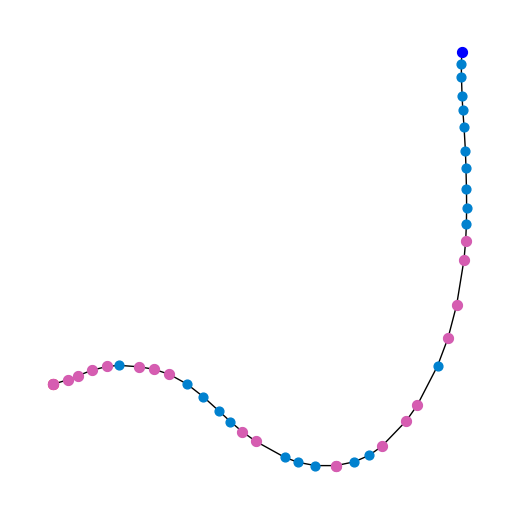

In [2]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, iterations=1000) # 力导向布局算法, 可以有效减少边的交叉, 可适当增加 iterations 的次数

plt.figure(figsize=(5, 5))

nx.draw(G, pos, node_size=40, with_labels=False, font_size=8, node_color='#0081CF')

# 标记指定节点
nx.draw_networkx_nodes(G, pos, {1 : "s"}, node_size=50, node_color='red')
nx.draw_networkx_nodes(G, pos, {40: "e"}, node_size=50, node_color='blue')

df = pd.read_excel("data/AGV_2.1.xlsx", sheet_name="无人车数据").fillna(-1)
df.columns = [i for i in range(15)]

start_point = [-1]
for i, row in df.iterrows():
    start_point.append(row[3])
    nx.draw_networkx_nodes(G, pos, [row[3]], node_size=50, node_color='#D65DB1')

plt.savefig("connect_2_1.png")

plt.show()

In [3]:
df = pd.read_excel("data/AGV_2.1.xlsx", sheet_name="无人车数据")
df.columns = [i for i in range(15)]

car = [0]
for i, row in df.iterrows():
    car.append(row[1])

In [4]:
import numpy as np
INF = 0x3f3f3f3f
df = pd.read_excel("data/AGV_2.1.xlsx").fillna(-1)
df.columns = [i for i in range(41)]
df.index = [i for i in range(1, 41)]

In [5]:
d = np.zeros((41, 41))
for i in range(41):
    for j in range(41):
        if i != j:
            d[i][j] = INF

for i, row in df.iterrows():
    for j in range(1, 41):
        if row[j] != float(-1):
            d[i][j] = row[j]


for k in range(1, 41):
    for i in range(1, 41):
        for j in range(1, 41):
            d[i][j] = min(d[i][j], d[i][k] + d[k][j])


In [9]:
print(d[1][2] / car[1] + d[2][4] / car[3] + d[4][10] / car[5] + d[10][13] / car[8] + d[13][15] / car[9] + d[15][19] / car[11] + d[19][23] / car[13]
     + d[23][24] / car[15] + d[24][33] / car[16] + d[33][36] / car[19] + d[36][40] / car[20])

9.88073252424499
